In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('wandb_results.csv')

In [3]:
len('kl_backward')

11

In [4]:
dataset.columns

Index(['omega', 'different-tree-24 - _step', 'different-tree-24 - _step__MIN',
       'different-tree-24 - _step__MAX', 'different-tree-24 - js',
       'different-tree-24 - js__MIN', 'different-tree-24 - js__MAX',
       'different-tree-24 - kl_backward',
       'different-tree-24 - kl_backward__MIN',
       'different-tree-24 - kl_backward__MAX',
       ...
       'flowing-fire-1 - js__MAX', 'flowing-fire-1 - kl_backward',
       'flowing-fire-1 - kl_backward__MIN',
       'flowing-fire-1 - kl_backward__MAX', 'flowing-fire-1 - kl_forward',
       'flowing-fire-1 - kl_forward__MIN', 'flowing-fire-1 - kl_forward__MAX',
       'flowing-fire-1 - sigma', 'flowing-fire-1 - sigma__MIN',
       'flowing-fire-1 - sigma__MAX'],
      dtype='object', length=451)

In [5]:
run_names, jss, sigmas, klbs, klfs = [], [],[], [], []
for c in dataset.columns:
    if c[-7:] == '- sigma':
        run_names = c.split(" ")[0]
        sigmas.append(dataset[c].values[0])
    elif c[-4:] == '- js':
        jss.append(dataset[c].values)
    elif c[-13:] == '- kl_backward':
        klfs.append(dataset[c].values)
    elif c[-12:] == '- kl_forward':
        klbs.append(dataset[c].values)
omega = dataset['omega'].values


        # reverse: KL(q,p) = KL(samples, true_samples) = KL(x_cur, target_sample) = kl_for
        # forward: KL(p,q) = KL(true_samples, samples) = kl_back

In [6]:
l_sigmas = np.log(sigmas)
l_sigmas = (l_sigmas-l_sigmas.min())/(l_sigmas.max()-l_sigmas.min())

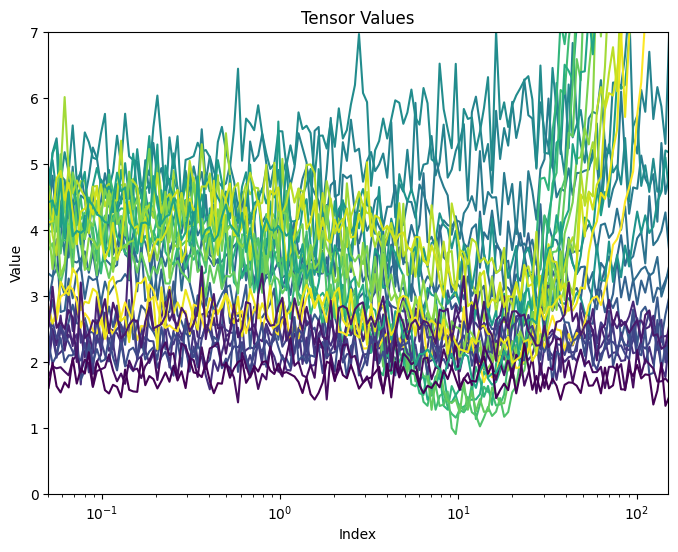

In [7]:
# Create a colormap object
cmap = plt.get_cmap('viridis')
# Plot the tensors as colored lines
plt.figure(figsize=(8, 6))
for i, js in enumerate(jss):
    plt.plot(omega, js, color=cmap(l_sigmas[i]))
# Customize the plot
plt.xlabel('Index')
plt.ylabel('Value')
# plt.legend([f'Line {i+1}' for i in range(k)], loc='upper right')
plt.xlim(0.05,150)
plt.ylim(0,7)
plt.xscale('log')
plt.title('Tensor Values')
plt.show()

In [13]:
l_sigmas

array([0.44827587, 0.13793104, 0.31034482, 0.37931034, 0.34482758,
       0.4137931 , 0.48275862, 0.68965517, 0.27586207, 0.86206896,
       0.65517241, 0.62068966, 0.72413793, 0.75862069, 0.55172414,
       0.51724138, 0.10344827, 0.89655173, 0.17241379, 0.79310345,
       1.        , 0.24137931, 0.20689655, 0.82758621, 0.03448275,
       0.93103449, 0.5862069 , 0.96551724, 0.        , 0.06896552])

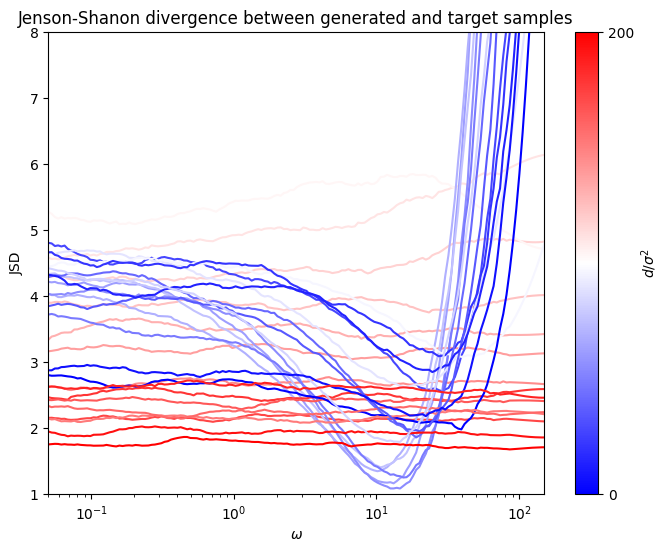

In [27]:
from scipy.signal import savgol_filter

cmap = plt.get_cmap('bwr')
# Plot the tensors as colored lines
fig, ax = plt.subplots(figsize=(8, 6))
for i, js in enumerate(jss):
    ax.plot(omega, savgol_filter(js, 51, 3) , color=cmap(1-l_sigmas[i]))
# Customize the plot
ax.set_xlabel(f'$\omega$')
ax.set_ylabel('JSD')
# ax.legend([f'Line {i+1}' for i in range(k)], loc='upper right')
ax.set_xlim(0.05,150)
ax.set_ylim(1,8)
ax.set_xscale('log')
ax.set_title('Jenson-Shanon divergence between generated and target samples')
# Create a proxy artist for the colorbar
proxy_artist = plt.Line2D([0], [0], linestyle="none", marker='o', markersize=6, markerfacecolor=cmap(0.5))
# Add a colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, label=f'$d/\sigma^2$')

ticks = np.linspace(0, 1, 2)  # 5 ticks between 0 and 1
labels = [str(round(2/x**2)) for x in [np.max(sigmas), np.min(sigmas)]]

# Update the colorbar with custom ticks and labels
cbar.set_ticks(ticks)
cbar.set_ticklabels(labels)
plt.savefig('paper_figs/jsd.pdf')
plt.show()

In [12]:
[2/x**2 for x in np.linspace(np.min(sigmas), np.max(sigmas), 5)]

[np.float64(199.99999403953572),
 np.float64(0.003180886055407808),
 np.float64(0.0007984023967802247),
 np.float64(0.00035531863698085546),
 np.float64(0.0002)]

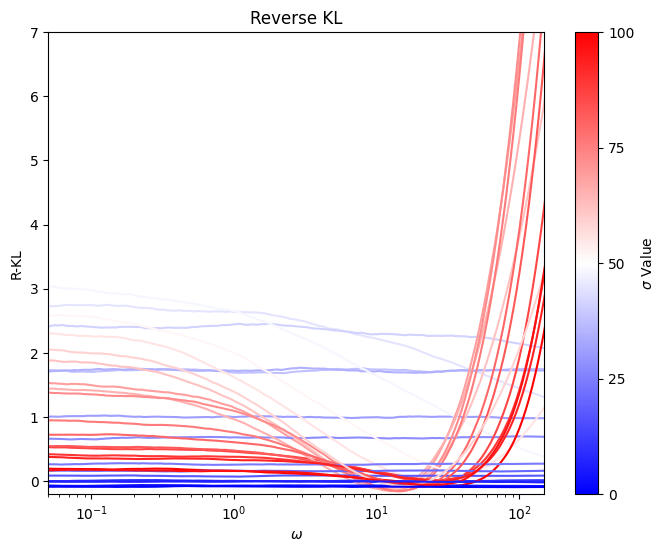

In [65]:
from scipy.signal import savgol_filter

cmap = plt.get_cmap('bwr')
# Plot the tensors as colored lines
fig, ax = plt.subplots(figsize=(8, 6))
for i, klb in enumerate(klbs):
    ax.plot(omega, savgol_filter(klb, 51, 3) , color=cmap(l_sigmas[i]))
# Customize the plot
ax.set_xlabel(f'$\omega$')
ax.set_ylabel('R-KL')
# ax.legend([f'Line {i+1}' for i in range(k)], loc='upper right')
ax.set_xlim(0.05,150)
ax.set_ylim(-0.2,7)
ax.set_xscale('log')
ax.set_title('Reverse KL')
# Create a proxy artist for the colorbar
proxy_artist = plt.Line2D([0], [0], linestyle="none", marker='o', markersize=6, markerfacecolor=cmap(0.5))
# Add a colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, label=f'$\sigma$ Value')

ticks = np.linspace(0, 1, 5)  # 5 ticks between 0 and 1
labels = [str(round(x)) for x in np.linspace(np.min(sigmas), np.max(sigmas), 5)]

# Update the colorbar with custom ticks and labels
cbar.set_ticks(ticks)
cbar.set_ticklabels(labels)
plt.show()

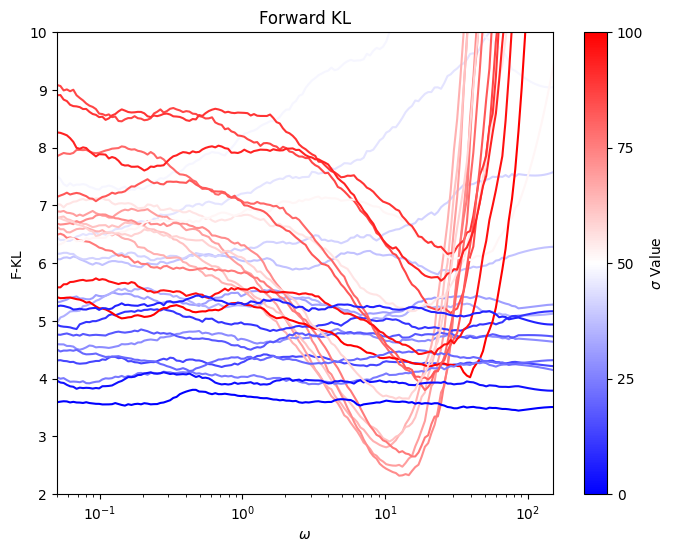

In [68]:
from scipy.signal import savgol_filter

cmap = plt.get_cmap('bwr')
# Plot the tensors as colored lines
fig, ax = plt.subplots(figsize=(8, 6))
for i, klf in enumerate(klfs):
    ax.plot(omega, savgol_filter(klf, 51, 3) , color=cmap(l_sigmas[i]))
# Customize the plot
ax.set_xlabel(f'$\omega$')
ax.set_ylabel('F-KL')
# ax.legend([f'Line {i+1}' for i in range(k)], loc='upper right')
ax.set_xlim(0.05,150)
ax.set_ylim(2,10)
ax.set_xscale('log')
ax.set_title('Forward KL')
# Create a proxy artist for the colorbar
proxy_artist = plt.Line2D([0], [0], linestyle="none", marker='o', markersize=6, markerfacecolor=cmap(0.5))
# Add a colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, label=f'$\sigma$ Value')

ticks = np.linspace(0, 1, 5)  # 5 ticks between 0 and 1
labels = [str(round(x)) for x in np.linspace(np.min(sigmas), np.max(sigmas), 5)]

# Update the colorbar with custom ticks and labels
cbar.set_ticks(ticks)
cbar.set_ticklabels(labels)
plt.show()